In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
bank_data = pd.read_csv(r"C:\Users\Taofeekat\Downloads\bank_data.csv", delimiter=";")

bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#check duplicates
bank_data.duplicated().sum() # Get a list of categorical columns

12

In [5]:
#Displaying all the duplicated rows
bank_data[bank_data.duplicated(subset=None, keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [6]:
#drop the 1 duplicate detected
bank_data.drop_duplicates(inplace = True)

In [7]:
#check duplicates
bank_data.duplicated().sum()

0

In [8]:
#rechecking data size
bank_data.shape

(41176, 21)

In [9]:
#finding missing values
for record in bank_data.columns:
    if bank_data[record].isnull().sum() > 0:
        print(record, np.round(bank_data[record].isnull().mean(),4), '%missing values')
    else:
        print('No missing Value')

No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value
No missing Value


In [10]:
##method 2

# Check for missing values in each column
missing_columns = []
for record in bank_data.columns:
    if bank_data[record].isnull().sum() > 0:
        missing_columns.append((record, np.round(bank_data[record].isnull().mean() * 100, 2)))

# Print the result
if len(missing_columns) == 0:
    print("No missing values")
else:
    for column, percentage in missing_columns:
        print(f"Column '{column}' has {percentage}% missing values")

No missing values


In [11]:
#Checking for each column unique identifier
for column in bank_data.columns:
    print(column,bank_data[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [12]:
# Get a list of categorical columns
cat_columns = bank_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical columns
print("Categorical columns:", cat_columns)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


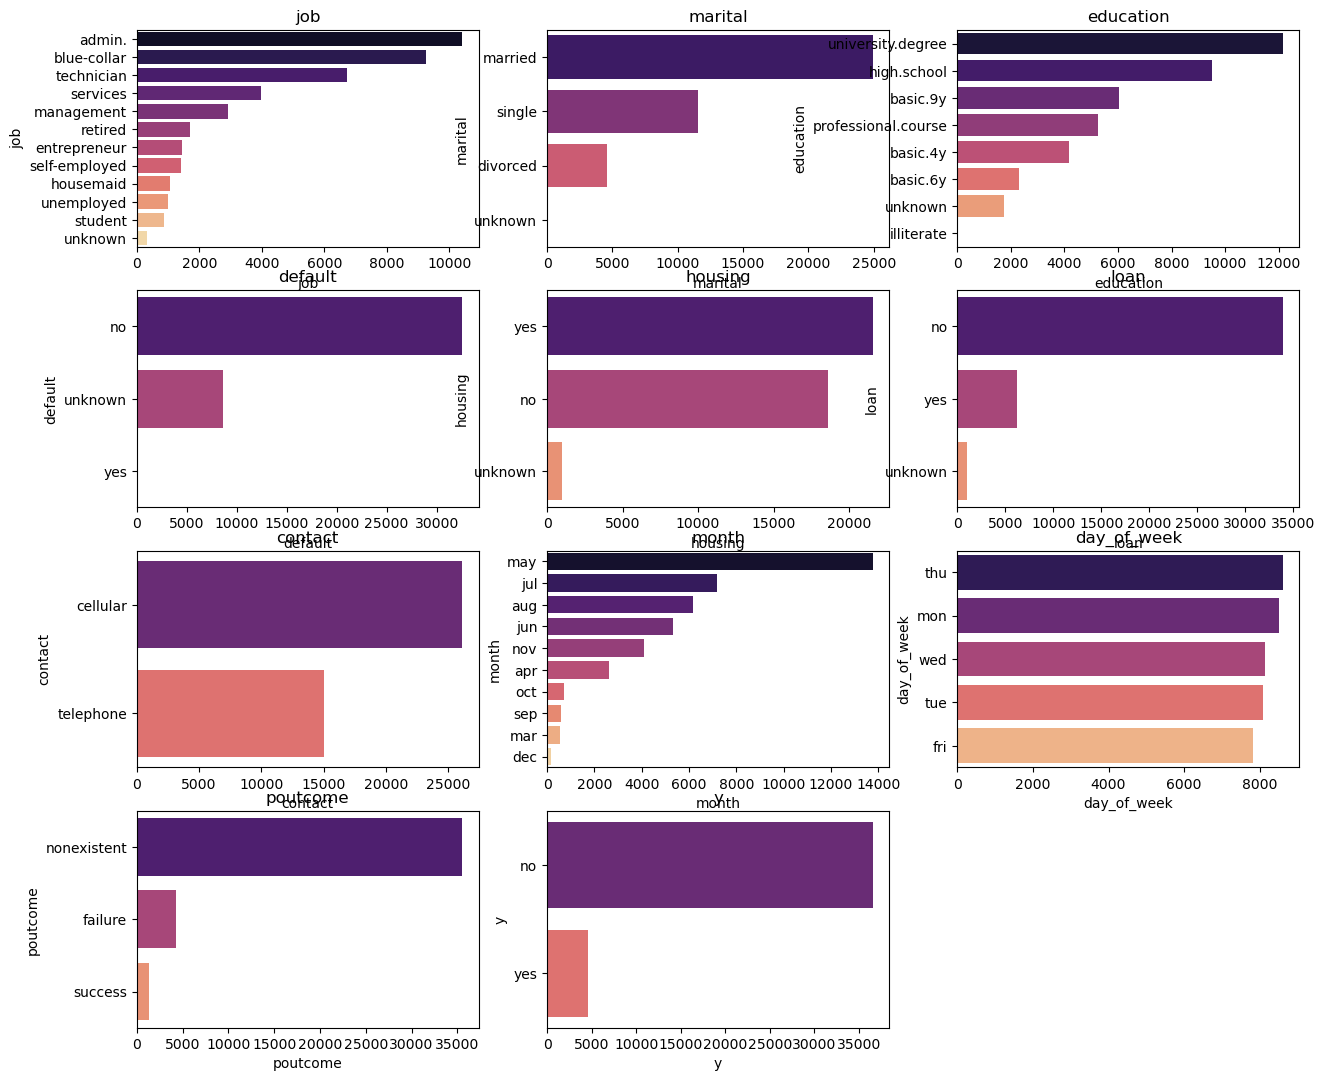

In [13]:
plt.figure(figsize=(15, 40))
plotnumber = 1
for cate in cat_columns:
    ax =plt.subplot(12,3, plotnumber)
    sns.countplot(y=cate, data = bank_data, order=bank_data[cate].value_counts().index, palette="magma")
    plt.xlabel(cate)
    plt.title(cate)
    plotnumber += 1
plt.show()

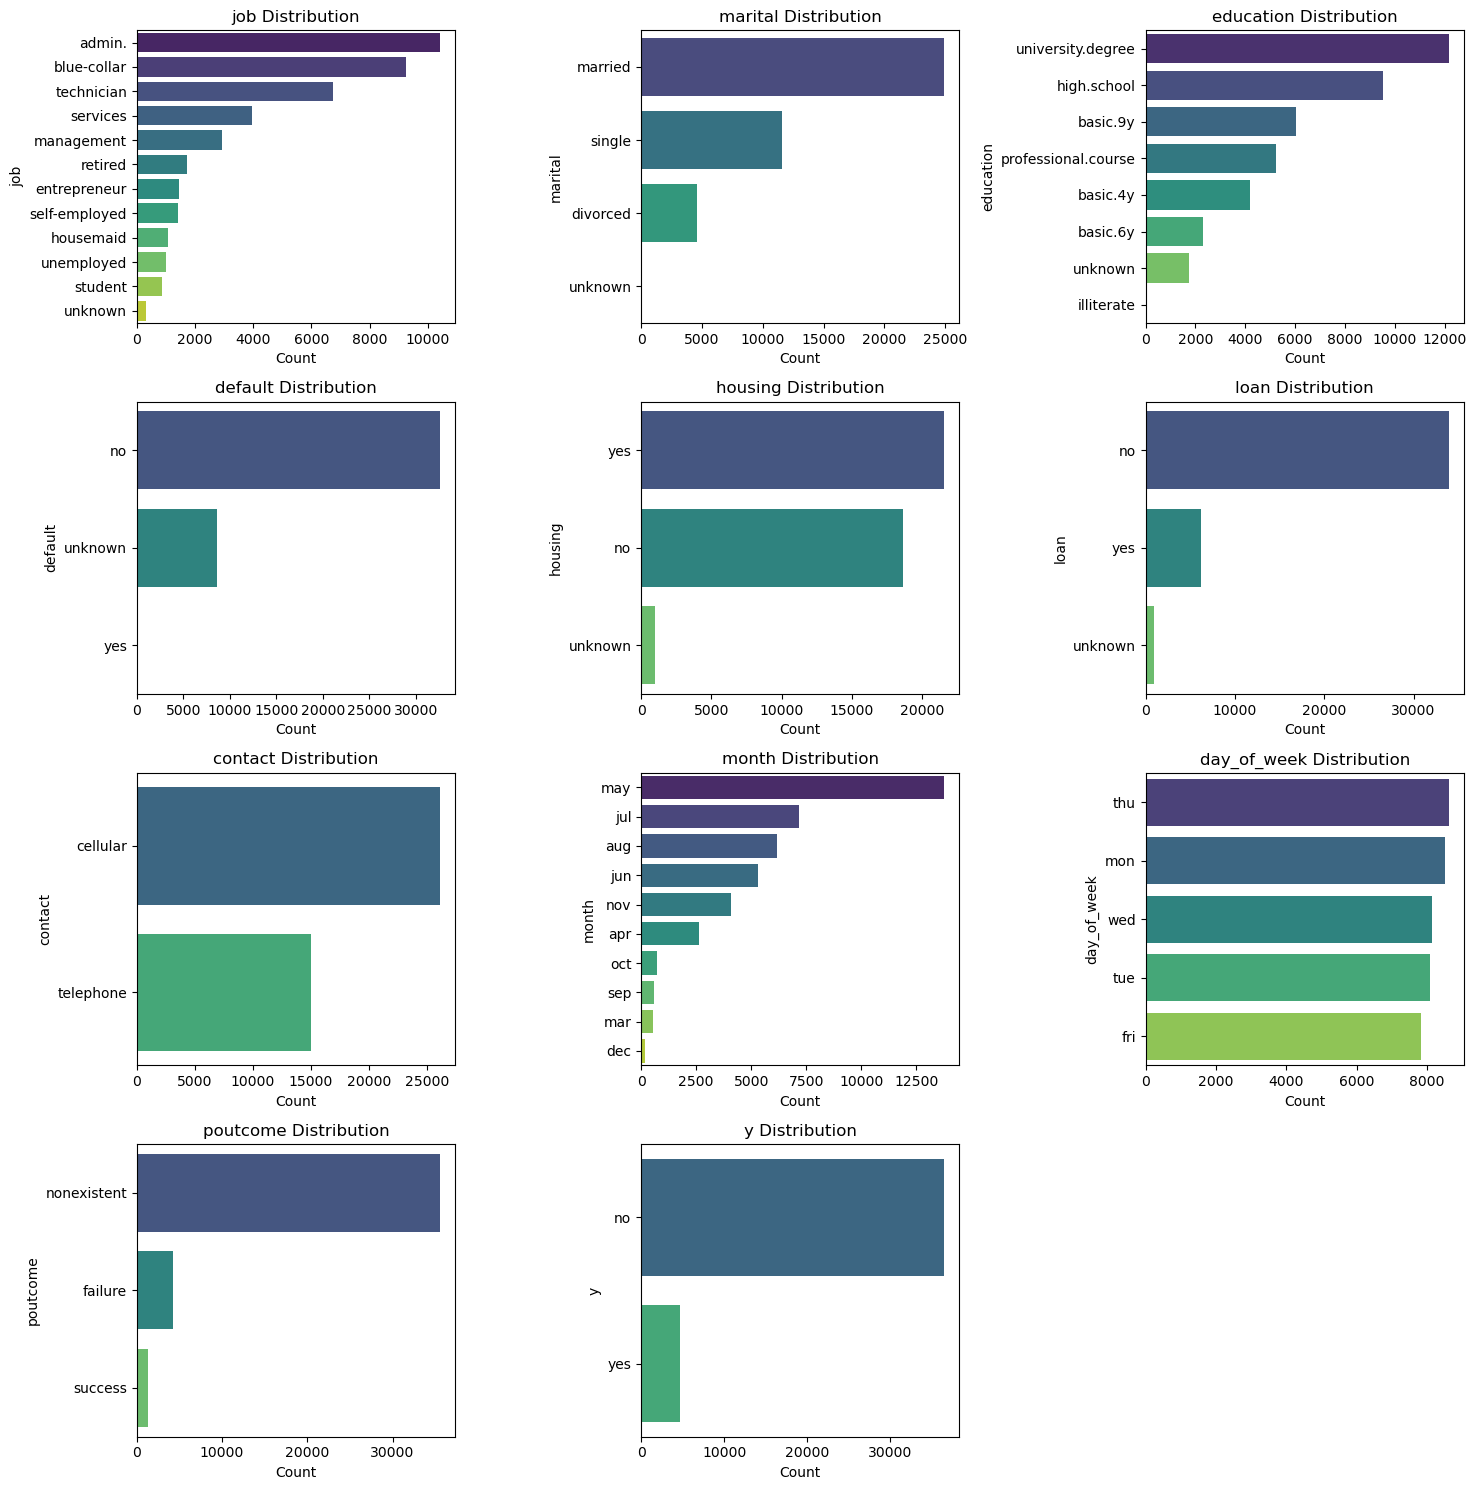

In [14]:
# Set the figure size
plt.figure(figsize=(15, 15))

# Define the number of rows and columns for subplots
num_rows = (len(cat_columns) + 2) // 3  # Ensure at least 3 columns per row


# Loop through each categorical column and create a countplot
for i, cate in enumerate(cat_columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(y=cate, data=bank_data, order=bank_data[cate].value_counts().index, palette="viridis")
    plt.xlabel("Count")
    plt.ylabel(cate)
    plt.title(f"{cate} Distribution")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
num_columns = bank_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of categorical columns
print("Numerical columns:", num_columns)

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [16]:
len(num_columns) 

10

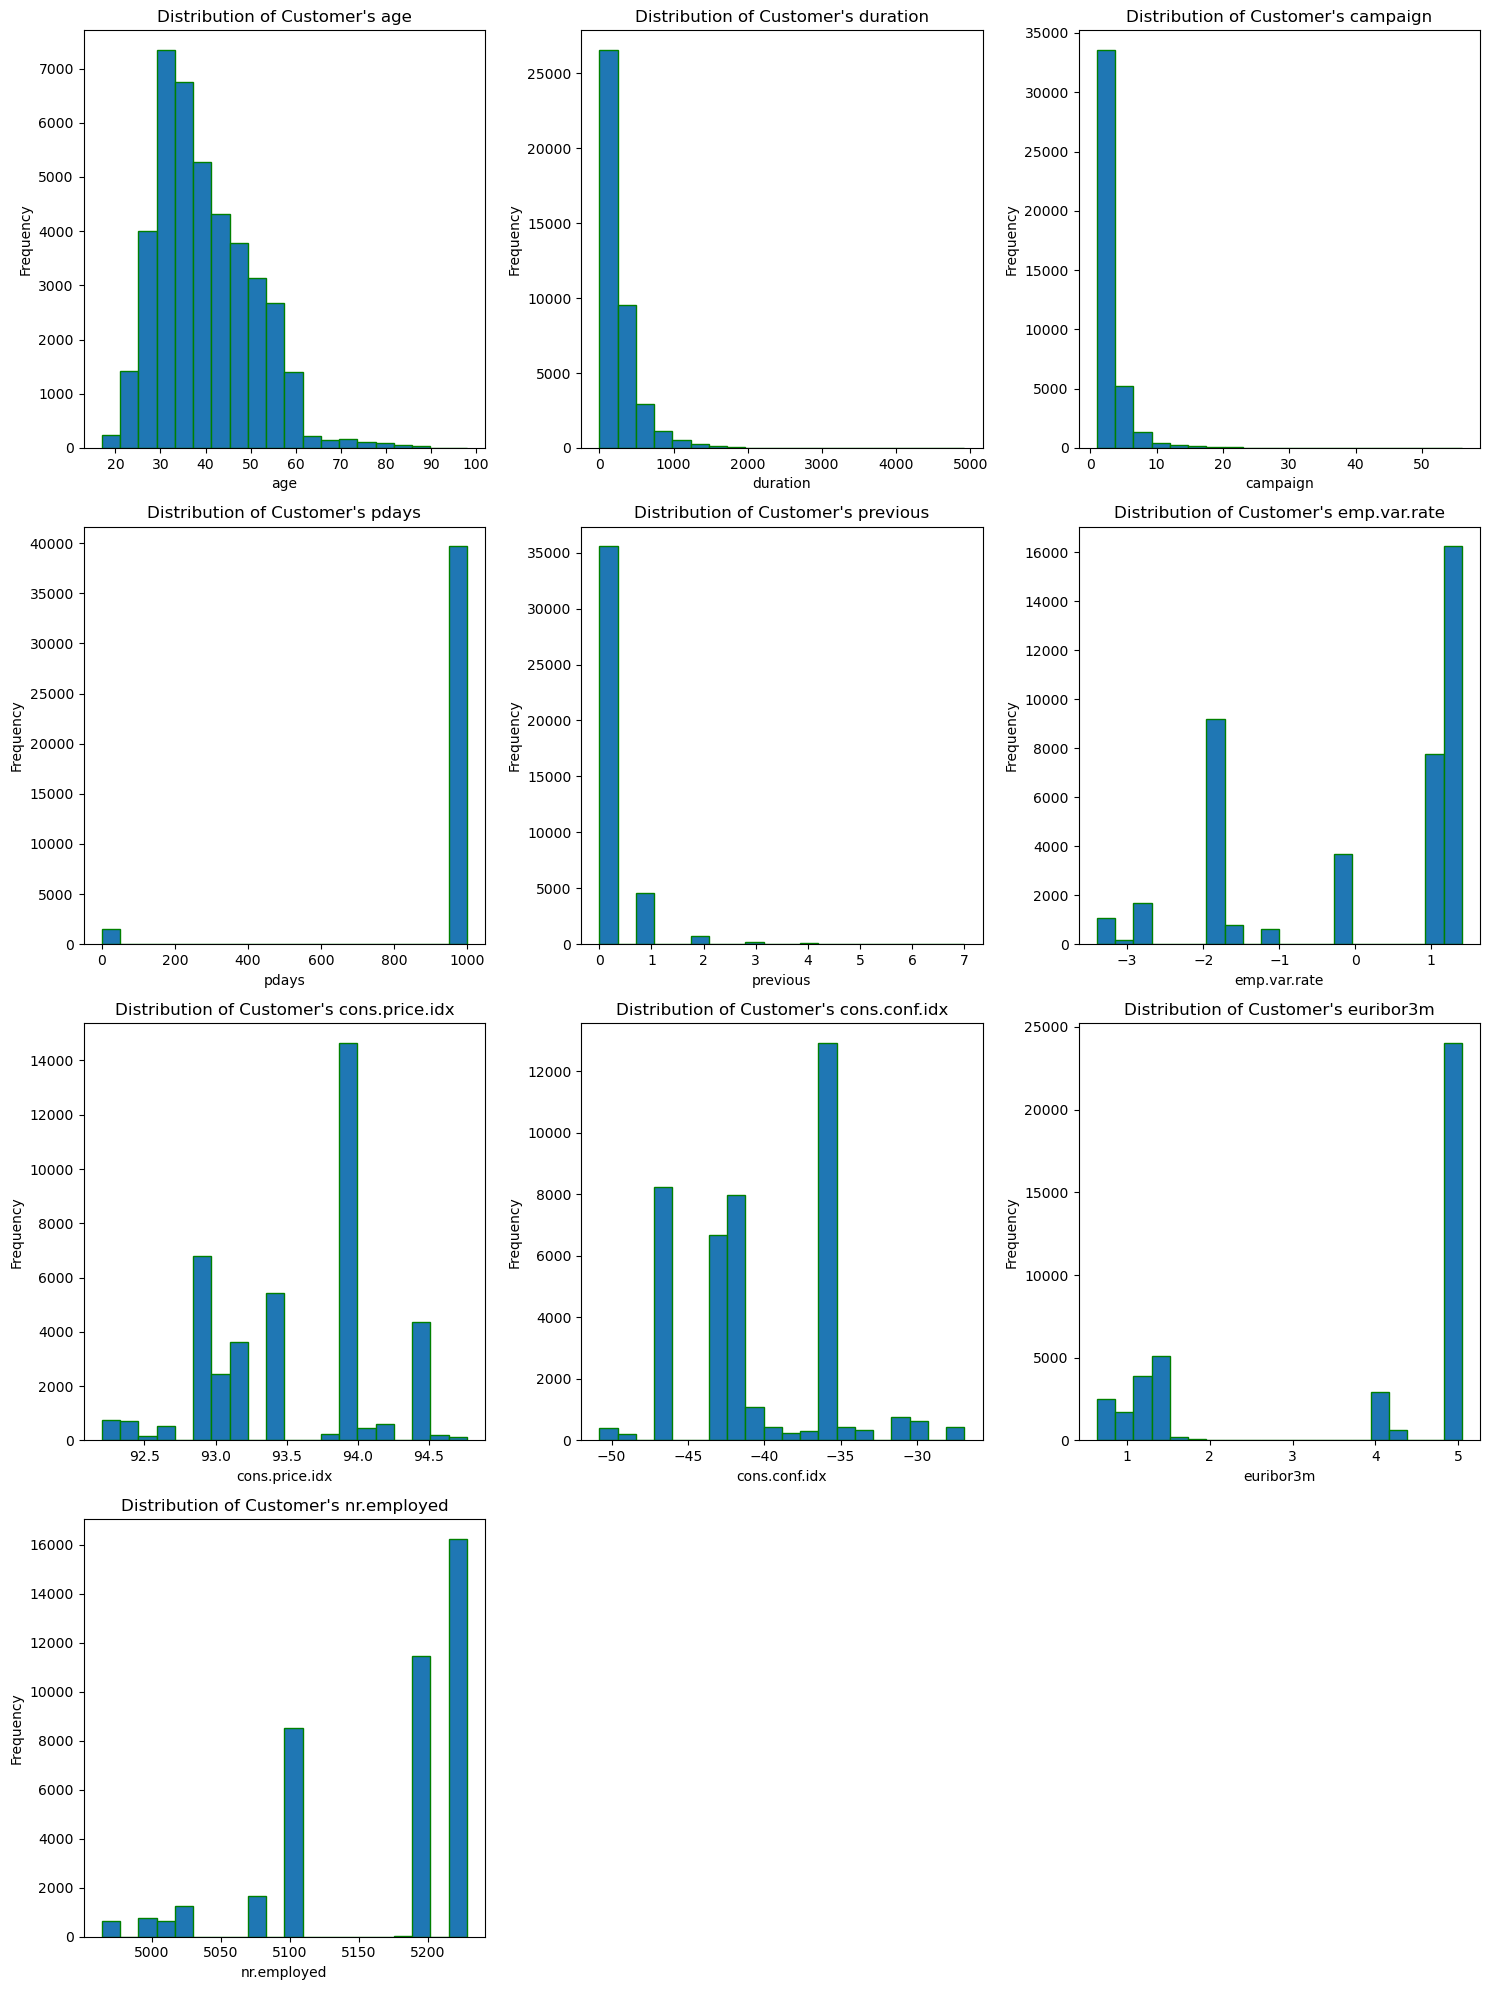

In [17]:
# Determine the number of rows and columns for subplots
num_numerical_columns = len(num_columns)
num_rows = (num_numerical_columns + 2) // 3  # Ensure at least 3 columns per row
num_cols = min(num_numerical_columns, 3)

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on the number of rows

# Loop through each numerical column and create a histogram
for i, categ in enumerate(num_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(bank_data[categ], bins=20, edgecolor='g')
    plt.xlabel(categ)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Customer's {categ}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

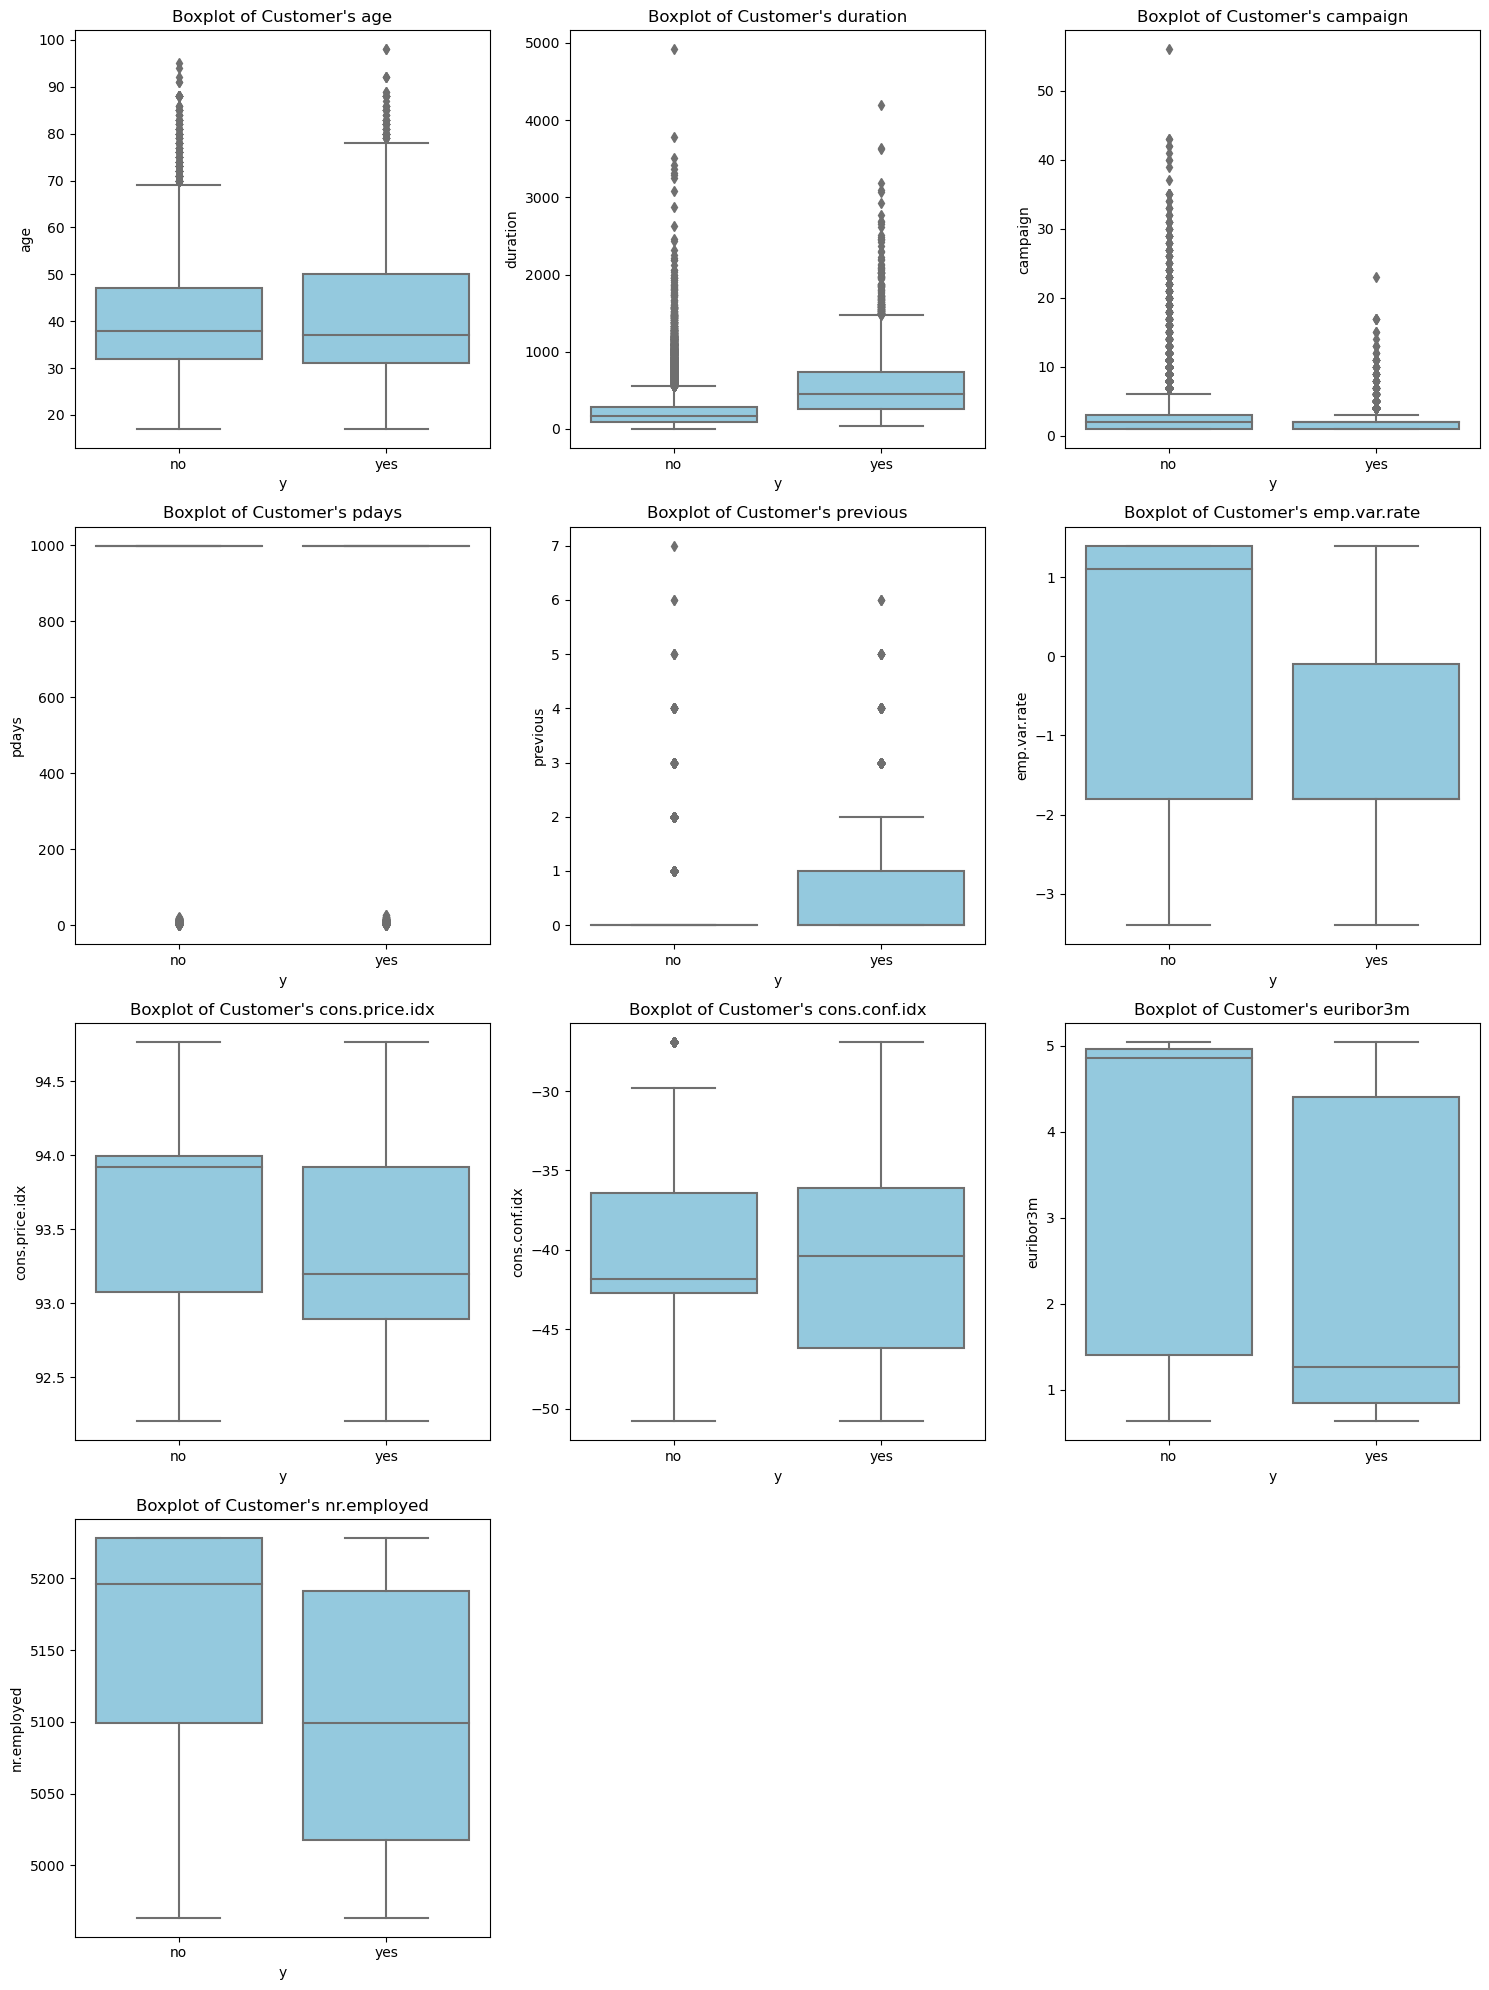

In [18]:
#BOXPLOT
# Determine the number of rows and columns for subplots
num_numerical_columns = len(num_columns)
num_rows = (num_numerical_columns + 2) // 3  # Ensure at least 3 columns per row
num_cols = min(num_numerical_columns, 3)

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on the number of rows

# Loop through each numerical column and create a histogram
for i, categ in enumerate(num_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=bank_data['y'], y=bank_data[categ], color='skyblue')
    plt.ylabel(categ)
    plt.title(f"Boxplot of Customer's {categ}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [19]:
#Encoding to convert categorical value to numerical 
labelencoder =LabelEncoder()
for column in cat_columns:
    bank_data[column] = labelencoder.fit_transform(bank_data[column])

In [20]:
#cheking the features
features = bank_data.iloc[:,:-1]
features

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [21]:
#Applying standardscaler
scaler = StandardScaler()
feature_scaler =scaler.fit_transform(features)

In [28]:
pca = PCA(n_components=2)
principal_component = pca.fit_transform(feature_scaler)

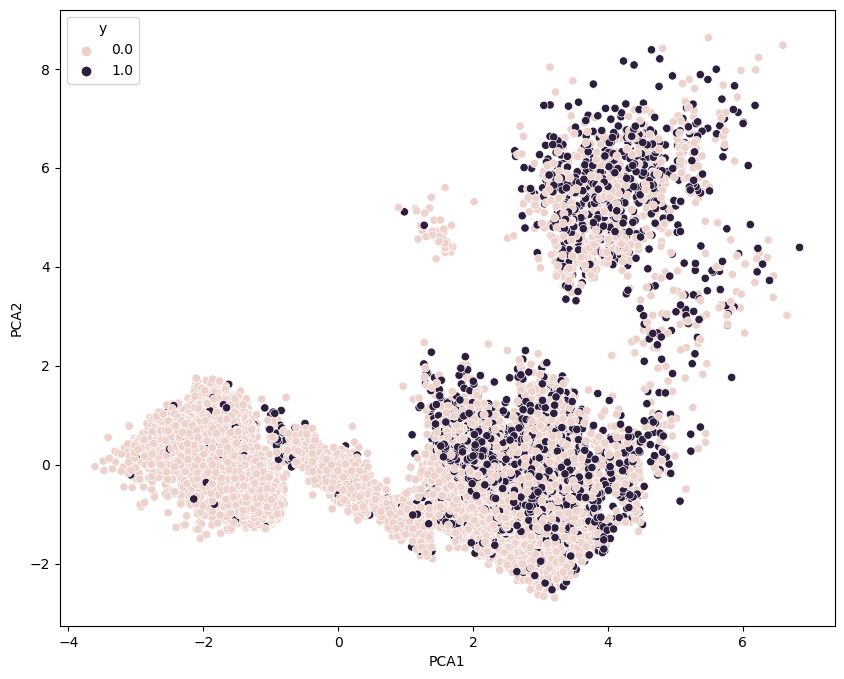

In [30]:
pca_df = pd.DataFrame(data = principal_component, columns = ['PCA1','PCA2'])
plt.figure(figsize=(10,8))
sns.scatterplot(x='PCA1',y='PCA2', hue= bank_data['y'], data = pca_df)
plt.title = ('Princial Component Analysis')
plt.show()

In [22]:
# Get the relative frequencies of each unique value in the 'target' column
bank_data['y'].value_counts(normalize=True)

0    0.887337
1    0.112663
Name: y, dtype: float64

In [23]:
#splitting the feature vs target. we will use all the other columns(feature) toanalyse the target. so we will remove target and store seperately
X = bank_data.drop(columns='y', axis = 1) #features
Y = bank_data['y'] #target

In [32]:
#Splitting data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(principal_component,Y, test_size=0.3, stratify=Y, random_state = 2 )

#check your train & test distribution
print(X.shape, X_train.shape, X_test.shape)

(41176, 20) (28823, 2) (12353, 2)


In [47]:
model_rf = RandomForestClassifier(n_estimators=150, max_features='auto', max_depth=4, criterion='entropy')
model_rf.fit(X_train,Y_train)
model_rf.score(X_test,Y_test)

0.9038290293855743

In [48]:
model_rf.score(X_train,Y_train)

0.9051105020296291

In [37]:
#
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state = 2 )
# Initialize decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier
decision_tree.fit(X_train, Y_train)

# Predict on the testing data
Y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8916862300655711
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10961
           1       0.52      0.52      0.52      1392

    accuracy                           0.89     12353
   macro avg       0.73      0.73      0.73     12353
weighted avg       0.89      0.89      0.89     12353

